In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [3]:
# We load the data.csv into a Dataframe
df = pd.read_csv('data.csv', encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

### Transactions per Country

In [5]:
# We count how many distinct countries are in the dataset
df['Country'].nunique()

38

In [6]:
# We count the transactions per country
countries = df['Country'].value_counts()
countries[:10]

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: Country, dtype: int64

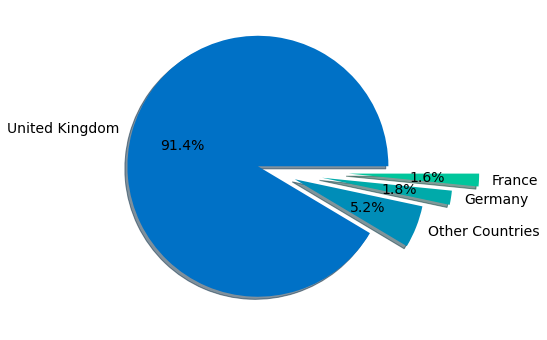

In [7]:
# We sum all countries from the fourth
countries[3] = countries[3:].sum()
# We drop all records after the fourth
countries = countries[:4]
# We rename the index of the fourth to "Other Countries"
countries.rename(index={countries.index[3]: "Other Countries"}, inplace=True)
# We sort the countries again
countries = countries.sort_values(ascending=False)
# We create a pie chart
countries.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6),
               fontsize=14, legend=False, explode=(0.1, 0.2, 0.4, 0.6), 
               shadow=True, colors=['#0071C6', '#008DB8', '#00AAAA','#00C69C'])
# We remove the y axis label
plt.ylabel('')
plt.show()

In [8]:
# We get the records with the highest price and the lowest price
highest = df[df['UnitPrice'] == df['UnitPrice'].max()]
lowest = df[df['UnitPrice'] == df['UnitPrice'].min()]

# We concatenate the findings to a new dataframe
highest_and_lowest = pd.concat([highest, lowest])
highest_and_lowest.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00,15098.0,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [9]:
# We sort the data by unit price and look at the highest values
df.sort_values(by='UnitPrice', ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00,15098.0,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:57,16453.71,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:49,13541.33,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:04,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,12/7/2010 15:34,13474.79,NaN,United Kingdom
524601,C580604,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:35,11586.50,NaN,United Kingdom
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom


In [10]:
df.sort_values(by='UnitPrice', ascending=True).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
40984,539750,22652,TRAVEL SEWING KIT,1,12/21/2010 15:40,0.00,NaN,United Kingdom
52217,540696,84562A,NaN,1,1/11/2011 9:14,0.00,NaN,United Kingdom
52262,540699,POST,NaN,1000,1/11/2011 9:32,0.00,NaN,United Kingdom
344867,567113,85215,Damaged,-29,9/16/2011 13:39,0.00,NaN,United Kingdom
204945,554696,85016,NaN,5,5/25/2011 17:14,0.00,NaN,United Kingdom
104419,545176,18098C,PORCELAIN BUTTERFLY OIL BURNER,6,2/28/2011 14:19,0.00,NaN,United Kingdom
104418,545176,20615,BLUE POLKADOT PASSPORT COVER,3,2/28/2011 14:19,0.00,NaN,United Kingdom
115488,546124,35610C,Thrown away.,-1121,3/9/2011 14:50,0.00,NaN,United Kingdom


In [11]:
# We get a list of StockCode for items with more than 1000 UnitPrice
items = df[df['UnitPrice'] > 1000]['StockCode'].unique()
items

array(['AMAZONFEE', 'M', 'BANK CHARGES', 'D', 'POST', 'DOT', 'B', 'CRUK'],
      dtype=object)

In [12]:
# We remove all records that have a StockCode that is contained in items.
df = df[~df['StockCode'].isin(items)]
# We remove all records with a negative UnitPrice.
df = df[df['UnitPrice'] > 0]

In [13]:
# We get the items with the highest UnitPrice.
highest_items = df.sort_values(by='UnitPrice', ascending=False)
highest_items.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/2011 15:28,649.5,15098.0,United Kingdom
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,6/10/2011 15:33,649.5,15098.0,United Kingdom
242589,C558359,S,SAMPLES,-1,6/28/2011 15:10,570.0,NaN,United Kingdom
82768,543253,22655,VINTAGE RED KITCHEN CABINET,1,2/4/2011 15:32,295.0,14842.0,United Kingdom
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,1/10/2011 14:57,295.0,17406.0,United Kingdom
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,12/2/2010 18:06,295.0,13145.0,United Kingdom
87141,C543632,22655,VINTAGE RED KITCHEN CABINET,-1,2/10/2011 16:22,295.0,14842.0,United Kingdom
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,12/16/2010 8:41,295.0,16607.0,United Kingdom
133994,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,3/25/2011 14:19,295.0,13452.0,United Kingdom
118769,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,3/14/2011 11:38,295.0,13452.0,United Kingdom


In [14]:
# We get the items with the lowest UnitPrice.
highest_items.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
396124,571054,16045,POPART WOODEN PENCILS ASST,100,10/13/2011 13:58,0.040,14234.0,United Kingdom
286813,562044,16045,POPART WOODEN PENCILS ASST,100,8/2/2011 10:24,0.040,16607.0,United Kingdom
276441,561047,16045,POPART WOODEN PENCILS ASST,900,7/24/2011 12:46,0.040,16948.0,United Kingdom
402329,571496,16045,POPART WOODEN PENCILS ASST,100,10/17/2011 15:02,0.040,13265.0,United Kingdom
267502,560300,16045,POPART WOODEN PENCILS ASST,100,7/18/2011 10:29,0.040,14911.0,EIRE
228959,557006,16045,POPART WOODEN PENCILS ASST,100,6/16/2011 11:29,0.040,14282.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.030,15838.0,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,7/26/2011 10:13,0.001,15618.0,United Kingdom
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,4/15/2011 9:27,0.001,13952.0,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,9/25/2011 14:58,0.001,16198.0,United Kingdom


In [15]:
# We get all items with a stock code that has no numbers in it and group them by stock code.
df[~df['StockCode'].str.contains('\d')].groupby('StockCode').count()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
StockCode,,,,,,,
DCGSSBOY,11,11,11,11,11,0,11
DCGSSGIRL,13,13,13,13,13,0,13
PADS,3,3,3,3,3,3,3
S,63,63,63,63,63,0,63
m,1,1,1,1,1,0,1


In [16]:
# We look at the items with the stock code DCGSSBOY, DCGSSGIRL, PADS, m
#df[df['StockCode'] == 'DCGSSBOY']
#df[df['StockCode'] == 'DCGSSGIRL']
#df[df['StockCode'] == 'PADS']
df[df['StockCode'] == 'm']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
40383,539736,m,Manual,1,12/21/2010 15:18,2.55,NaN,United Kingdom


In [17]:
# We remove all items with the StockCode S and m.
df = df[~df['StockCode'].isin(['S', 'm'])]

In [18]:
# We compute the Revenue that each record created. Revenue = Quantity * UnitPrice
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


## Examining the Invoices

In [19]:
# We compute the mean, mediam, variance and skewness of the revenue
print('Mean: ', df['Revenue'].mean())
print('Median: ', df['Revenue'].median())
print('Mode: ', df['Revenue'].mode())
print('Variance: ', df['Revenue'].var())
print('Skewness: ', df['Revenue'].skew())

Mean:  18.262520415027605
Median:  9.84
Mode:  0    15.0
Name: Revenue, dtype: float64
Variance:  135342.62011896426
Skewness:  2.2162840252087115


C:\Users\Marco\.virtualenvs\code-1xdZz6Z2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


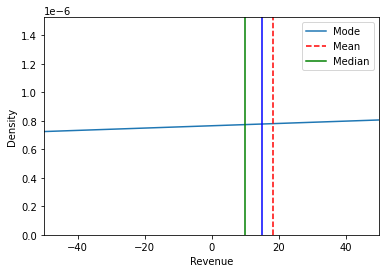

In [20]:
# We create another plot that contains the mean, median and mode
plot = sns.distplot(df['Revenue'], hist=False)
plot.set_xlim(-50, 50)
plot.axvline(df['Revenue'].mean(), color='r', linestyle='--')
plot.axvline(df['Revenue'].median(), color='g', linestyle='-')
plot.axvline(df['Revenue'].mode()[0], color='b', linestyle='-')

# We add the three lines to the legend
plot.legend({'Mode':df['Revenue'].mode()[0], 'Mean':df['Revenue'].mean(), 'Median':df['Revenue'].median()})
plt.show()

C:\Users\Marco\.virtualenvs\code-1xdZz6Z2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Marco\.virtualenvs\code-1xdZz6Z2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


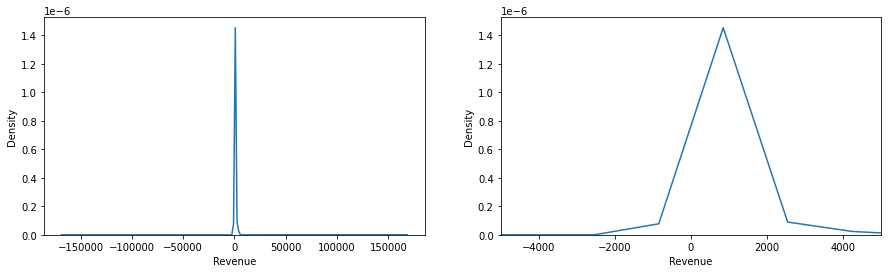

In [21]:
# We create a plot with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

# The first subplot is a distribution plot of the revenue
sns.distplot(df['Revenue'], ax=axes[0], hist=False)

# The second subplot is a distribution plot of the revenue which limits the x axis between -5000 and 5000
sns.distplot(df['Revenue'], ax=axes[1], hist=False)
axes[1].set_xlim(-5000, 5000)

plt.show()

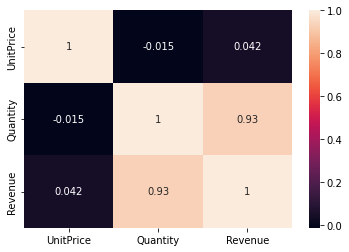

In [22]:
# Create a heatmap from the correlations between the unit price, quantity and the revenue
sns.heatmap(df[['UnitPrice', 'Quantity', 'Revenue']].corr(), annot=True)
plt.show()

In [23]:
# We compute the percentage of how many invoices only have a quantity of -1 or 1
percentage_greater_one = df[(df['Quantity'] == -1) | (df['Quantity'] == 1)].count() / df[(df['Quantity'] > -1) | (df['Quantity'] < 1)].count() * 100
round(percentage_greater_one[0], 2)

27.98

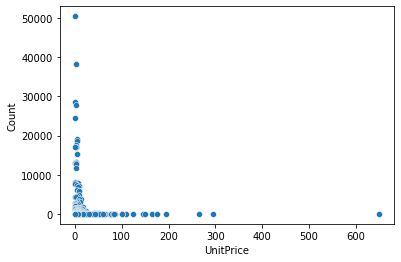

In [24]:
# We compute a count of how often a single UnitPrice appears
unitprice_count = df['UnitPrice'].value_counts()
quantity_count = df['Quantity'].value_counts()

# We create a scatterplot of the unit prices and of the quantities
sns.scatterplot(x=unitprice_count.index, y=unitprice_count.values)
plt.xlabel('UnitPrice')
plt.ylabel('Count')
plt.show()

## Exploring the Items

In [25]:
# We create a new dataframe
sales_df = pd.DataFrame(columns=['Sales', 'Returns', 'Percentage Returns', 'Cash Sales', 'Cash Returns', 'Net Results', 'Name'])

# We compute the number of sales per item. Only records with positive quantity are sales
sales_df['Sales'] = df[df['Quantity'] > 0].groupby('StockCode')['Quantity'].sum()

# We compute the number of returns per item. Only records with negative quantity are returns
sales_df['Returns'] = abs(df[df['Quantity'] < 0].groupby('StockCode')['Quantity'].sum())

# We compute the amount of cash that the sales generated
sales_df['Cash Sales'] = df[df['Quantity'] > 0].groupby('StockCode')['Revenue'].sum()

# We compute the amount of cash that the returns cost
sales_df['Cash Returns'] = abs(df[df['Quantity'] < 0].groupby('StockCode')['Revenue'].sum())

# We set all NaN values to 0.
sales_df.fillna(0, inplace=True)

# We compute the percentage of returns to sales per item
sales_df['Percentage Returns'] = round(sales_df['Returns'] / sales_df['Sales'] * 100, 2)

# We compute the sum net results of each item
sales_df['Net Results'] = df.groupby('StockCode')['Revenue'].sum()

# We add name of each item as the second column
sales_df['Name'] = df.drop_duplicates(subset=['StockCode'])[['StockCode', 'Description']].set_index('StockCode')['Description']

In [26]:
# We show the items with the highest total Net Results
sales_df.sort_values(by='Net Results', ascending=False).head()

,Sales,Returns,Percentage Returns,Cash Sales,Cash Returns,Net Results,Name
StockCode,,,,,,,
22423,13879,857.0,6.17,174484.74,9722.55,164762.19,REGENCY CAKESTAND 3 TIER
47566,18295,277.0,1.51,99504.33,1201.35,98302.98,PARTY BUNTING
85123A,37660,2578.0,6.85,104518.80,6624.30,97894.50,WHITE HANGING HEART T-LIGHT HOLDER
85099B,48474,1115.0,2.30,94340.05,1984.02,92356.03,JUMBO BAG RED RETROSPOT
23084,30788,108.0,0.35,66964.99,208.40,66756.59,RABBIT NIGHT LIGHT


In [27]:
# We show the items with the lowest total Net Results
sales_df.sort_values(by='Net Results', ascending=True).head()

,Sales,Returns,Percentage Returns,Cash Sales,Cash Returns,Net Results,Name
StockCode,,,,,,,
35400,10,16.0,160.0,89.50,135.20,-45.70,WOODEN BOX ADVENT CALENDAR
79323P,4,8.0,200.0,27.00,54.00,-27.00,PINK CHERRY LIGHTS
20703,1,7.0,700.0,4.25,29.75,-25.50,BLUE PADDED SOFT MOBILE
84750A,24,27.0,112.5,46.80,52.65,-5.85,PINK SMALL GLASS CAKE STAND
22034,10,12.0,120.0,5.02,5.04,-0.02,ROBIN CHRISTMAS CARD


C:\Users\Marco\.virtualenvs\code-1xdZz6Z2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Marco\.virtualenvs\code-1xdZz6Z2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


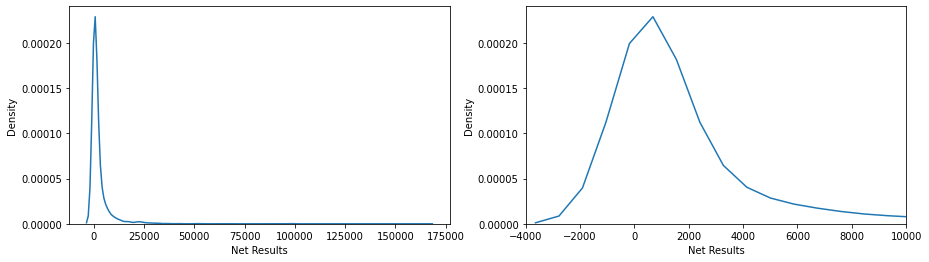

In [28]:
# We create a plot with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
# The first subplot is a distribution plot of the net results
sns.distplot(sales_df['Net Results'], ax=axes[0], hist=False)
# The second subplot is a distribution plot of the net results which limits the x axis between -2500 and 25000
sns.distplot(sales_df['Net Results'], ax=axes[1], hist=False)
axes[1].set_xlim(-4000, 10000)
plt.show()

In [29]:
# We try to find the number of items that split the sum of net results
item_count = 248

print(sales_df.sort_values(by='Net Results', ascending=False)[:item_count]['Net Results'].sum())
print(sales_df.sort_values(by='Net Results', ascending=False)[item_count:]['Net Results'].sum())

# We compute the percentage of item_count to the number of all items
print(round(item_count * 100 / len(sales_df), 2)) 

4902723.88
4897867.282999999
6.34


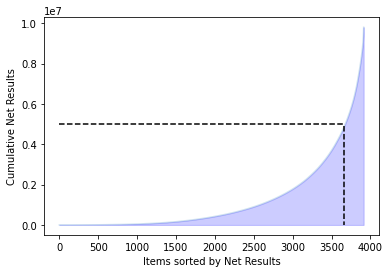

In [30]:
# We sort the items by the Net results
sorted_items = sales_df.sort_values(by='Net Results', ascending=True)

# We create a lineplot with x as the number of items and y as the cumulative Net results
sns.lineplot(x=range(len(sales_df)), y=sorted_items['Net Results'].cumsum(), alpha=0.2)

# We add a description for the x-axis
plt.xlabel('Items sorted by Net Results')

# We format the y-axis to show millions
plt.ylabel('Cumulative Net Results')

# We fill the area between the curve and the x-axis
plt.fill_between(range(len(sales_df)), sorted_items['Net Results'].cumsum(), color='blue', alpha=0.2)

# We plot a line at the point where approximately 50% of the cumulative Net Results are
y0 = sorted_items['Net Results'][:len(sales_df)-item_count].cumsum()
y1 = sorted_items['Net Results'][len(sales_df)-item_count:].cumsum()
plt.plot([len(sales_df)-item_count, len(sales_df)-item_count], [y0[-1], y1[0]], 'k--')
# We plot a horizontal line at the point where approximately 50% of the cumulative Net Results are
plt.plot([0, len(sales_df)-item_count], [0.5e7, 0.5e7], 'k--')
plt.show()

### Exploring the Monthly Aggregations

In [31]:
# We create a new dataframe: Year, Sales, Returns, Cash Sales, Cash Returns, Net Results.
monthly_df = pd.DataFrame(columns=['Month', 'Sales', 'Returns', 'Percentage Returns', 'Cash Sales',
                                   'Cash Returns', 'Percentage Cash Returns', 'Net Results', 'Percentage Net Results'])

months = ['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']

# We add the months list to the monthly_df
monthly_df['Month'] = months

# We reindex the dataframe to start with index 1
monthly_df.index = range(1, len(monthly_df) + 1)

# We convert the 'InvoiceDate' of df into datetime values
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# We compute the number of sales per month
monthly_df['Sales'] = df[df['Quantity'] > 0].groupby(df['InvoiceDate'].dt.month)['Quantity'].sum()

# We compute the number of returns per month
monthly_df['Returns'] = abs(df[df['Quantity'] < 0].groupby(df['InvoiceDate'].dt.month)['Quantity'].sum())

# We compute the cash that the sales generated per month
monthly_df['Cash Sales'] = round(df[df['Quantity'] > 0].groupby(df['InvoiceDate'].dt.month)['Revenue'].sum(), 2)

# We compute the cash that the returns cost per month
monthly_df['Cash Returns'] = abs(df[df['Quantity'] < 0].groupby(df['InvoiceDate'].dt.month)['Revenue'].sum())

# We compute the percentage of returns per month
monthly_df['Percentage Returns'] = round(monthly_df['Returns'] / monthly_df['Sales'] * 100, 2)

# We compute the percentage of cash returns per month
monthly_df['Percentage Cash Returns'] = round(monthly_df['Cash Returns'] / monthly_df['Cash Sales'] * 100, 2)

# We compute the net results
monthly_df['Net Results'] = round(df.groupby(df['InvoiceDate'].dt.month)['Revenue'].sum(), 2)

# We compute the percentage of net results of that the month to the sum of the net results
monthly_df['Percentage Net Results'] = round(monthly_df['Net Results'] / monthly_df['Net Results'].sum() * 100, 2)

monthly_df

,Month,Sales,Returns,Percentage Returns,Cash Sales,Cash Returns,Percentage Cash Returns,Net Results,Percentage Net Results
1,January,387431,79785,20.59,672192.41,91576.30,13.62,580616.11,5.92
2,February,283256,2606,0.92,509167.87,8375.87,1.65,500792.00,5.11
3,March,377125,4338,1.15,692015.94,10675.30,1.54,681340.64,6.95
4,April,308526,13600,4.41,516709.79,33316.91,6.45,483392.88,4.93
5,May,395404,4057,1.03,741711.74,8948.23,1.21,732763.51,7.48
6,June,388843,7216,1.86,739426.88,13775.84,1.86,725651.04,7.40
7,July,401369,5946,1.48,689947.74,11409.21,1.65,678538.53,6.92
8,August,421459,11662,2.77,726005.16,22929.52,3.16,703075.64,7.17
9,September,569967,7084,1.24,1031400.36,17044.68,1.65,1014355.68,10.35
10,October,621744,23847,3.84,1107386.49,43992.16,3.97,1063394.33,10.85


C:\Users\Marco\.virtualenvs\code-1xdZz6Z2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Marco\.virtualenvs\code-1xdZz6Z2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


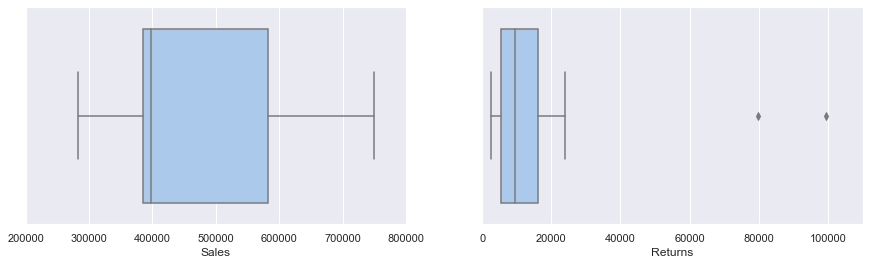

In [77]:
# We create a plot with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

# The first subplot is a boxplot of the sales
sns.boxplot(monthly_df['Sales'], ax=axes[0], palette='pastel')
axes[0].set_xlim(200000, 800000)

# The second subplot is a boxplot of the returns
sns.boxplot(monthly_df['Returns'], ax=axes[1], palette='pastel')
axes[1].set_xlim(0, 110000)

plt.show()

In [33]:
# We create a copy of the dataframe.
norm_monthly_df = monthly_df.copy()
# We normalize each column except Month to have values between 0 and 1
norm_monthly_df.iloc[:, 1:] = norm_monthly_df.iloc[:, 1:].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

C:\Users\Marco\AppData\Local\Temp\ipykernel_10232\3412346113.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(norm_monthly_df['Month'], rotation=90)


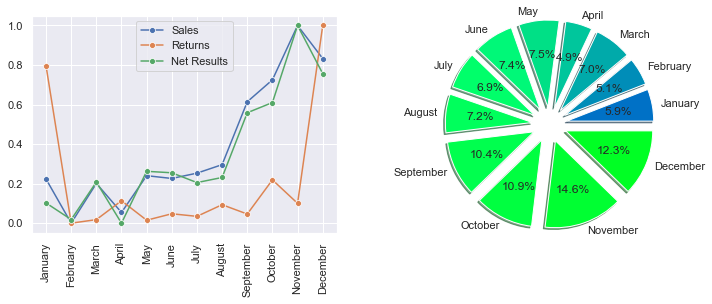

In [79]:
# We create a plot with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# We create a lineplot of the sales and returns per month.
sns.lineplot(x=norm_monthly_df['Month'], y=norm_monthly_df['Sales'], label='Sales', ax=axes[0], marker='o')
sns.lineplot(x=norm_monthly_df['Month'], y=norm_monthly_df['Returns'], label='Returns', ax=axes[0], marker='o')
sns.lineplot(x=norm_monthly_df['Month'], y=norm_monthly_df['Net Results'], label='Net Results', ax=axes[0], marker='o')
# We rotate the xticks by 90 degrees
axes[0].set_xticklabels(norm_monthly_df['Month'], rotation=90)
# We turn of the x axis description
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# We create a piechart of the net results per month
explode = [0.2] * len(norm_monthly_df)
colors = colors=['#0071C6', '#008DB8', '#00AAAA','#00C69C', '#00E086', '#00F878', '#00FF6A', '#00FF5C', '#00FF4E', '#00FF40', '#00FF32', '#00FF24']
axes[1].pie(monthly_df['Net Results'], labels=norm_monthly_df['Month'], autopct='%1.1f%%', shadow=True, explode=explode, colors=colors)

plt.show()